# BUSA3020 Programming Task 2 - Customer Segmentation

**Assignment Points**: 100    
**Due Date**: Friday of Week 11 (17 May 2024) at 11:59pm    
**Jupyter Notebook** version  


---

### 1. Exploratory Data Analysis

In [1]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

**Read file**

In [2]:
# Read file and check null values
df = pd.read_csv("assignment_dataset.csv")
print(df.info())
print(df.isnull().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           4000 non-null   int64
 1   Marital Status   4000 non-null   int64
 2   Education        4000 non-null   int64
 3   Settlement Size  4000 non-null   int64
 4   Occupation       4000 non-null   int64
 5   Income           4000 non-null   int64
 6   Age              4000 non-null   int64
dtypes: int64(7)
memory usage: 218.9 KB
None
Gender             0
Marital Status     0
Education          0
Settlement Size    0
Occupation         0
Income             0
Age                0
dtype: int64


,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0,0,3,2,2,185611,50
1,0,1,1,0,1,114778,30
2,0,1,1,0,0,132788,34
3,0,1,3,2,2,209671,55
4,1,1,1,2,1,118593,44


**Encode categorical features**

In [3]:
categories_encoded = OrdinalEncoder()
#categorical_values = categories_encoded.fit_transform(df[['Gender', 'Marital Status', 'Education', 'Settlement Size', 'Occupation']])

df['Gender'] = categories_encoded.fit_transform(df[['Gender']])
df['Marital Status'] = categories_encoded.fit_transform(df[['Marital Status']])
df['Education'] = categories_encoded.fit_transform(df[['Education']])
df['Settlement Size'] = categories_encoded.fit_transform(df[['Settlement Size']])
df['Occupation'] = categories_encoded.fit_transform(df[['Occupation']])

**Key summary statistics and essential charts before cleaning data** - Add comment in Word report to explain the chart only

In [4]:
df.describe()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.489500,0.510500,1.708250,1.090000,1.200750,134353.792250,39.946250
std,0.499952,0.499952,1.024155,0.869246,0.526326,48533.567076,10.269724
min,0.000000,0.000000,0.000000,0.000000,0.000000,35832.000000,18.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,97815.250000,32.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,122607.000000,38.000000
75%,1.000000,1.000000,3.000000,2.000000,2.000000,165920.250000,47.000000
max,1.000000,1.000000,3.000000,2.000000,2.000000,309364.000000,76.000000


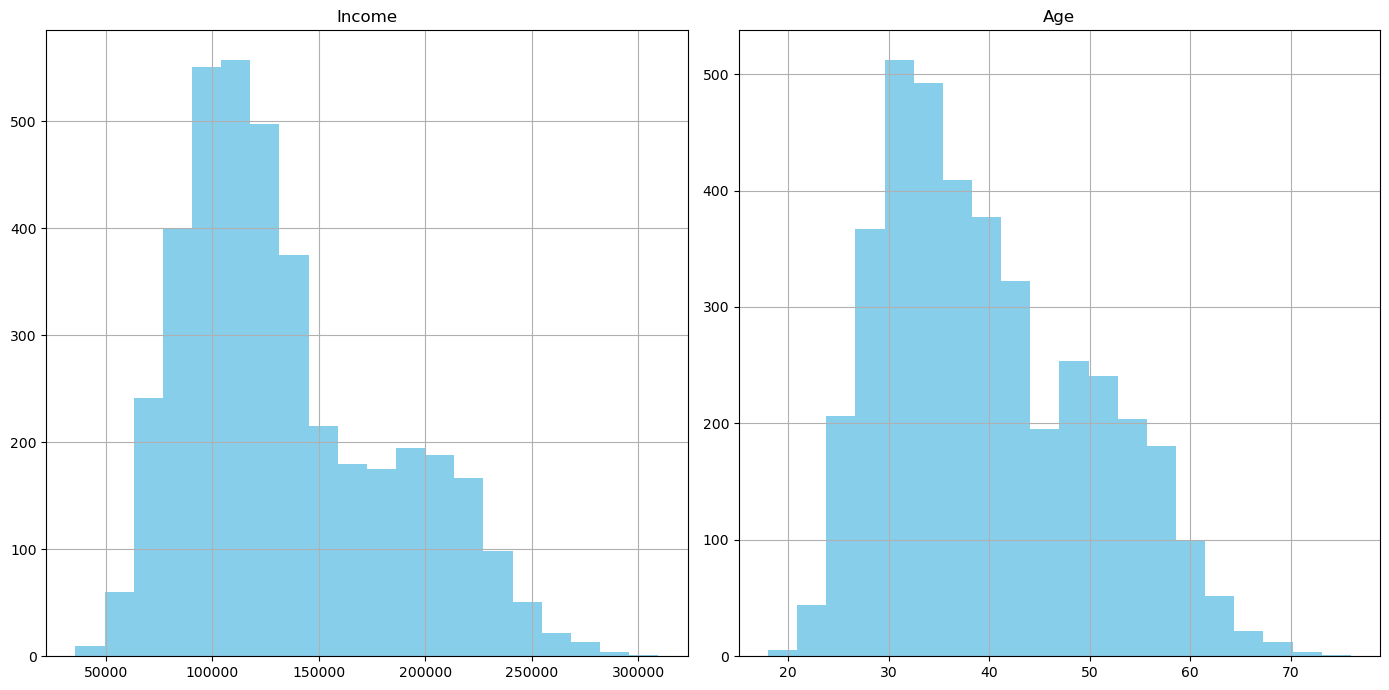

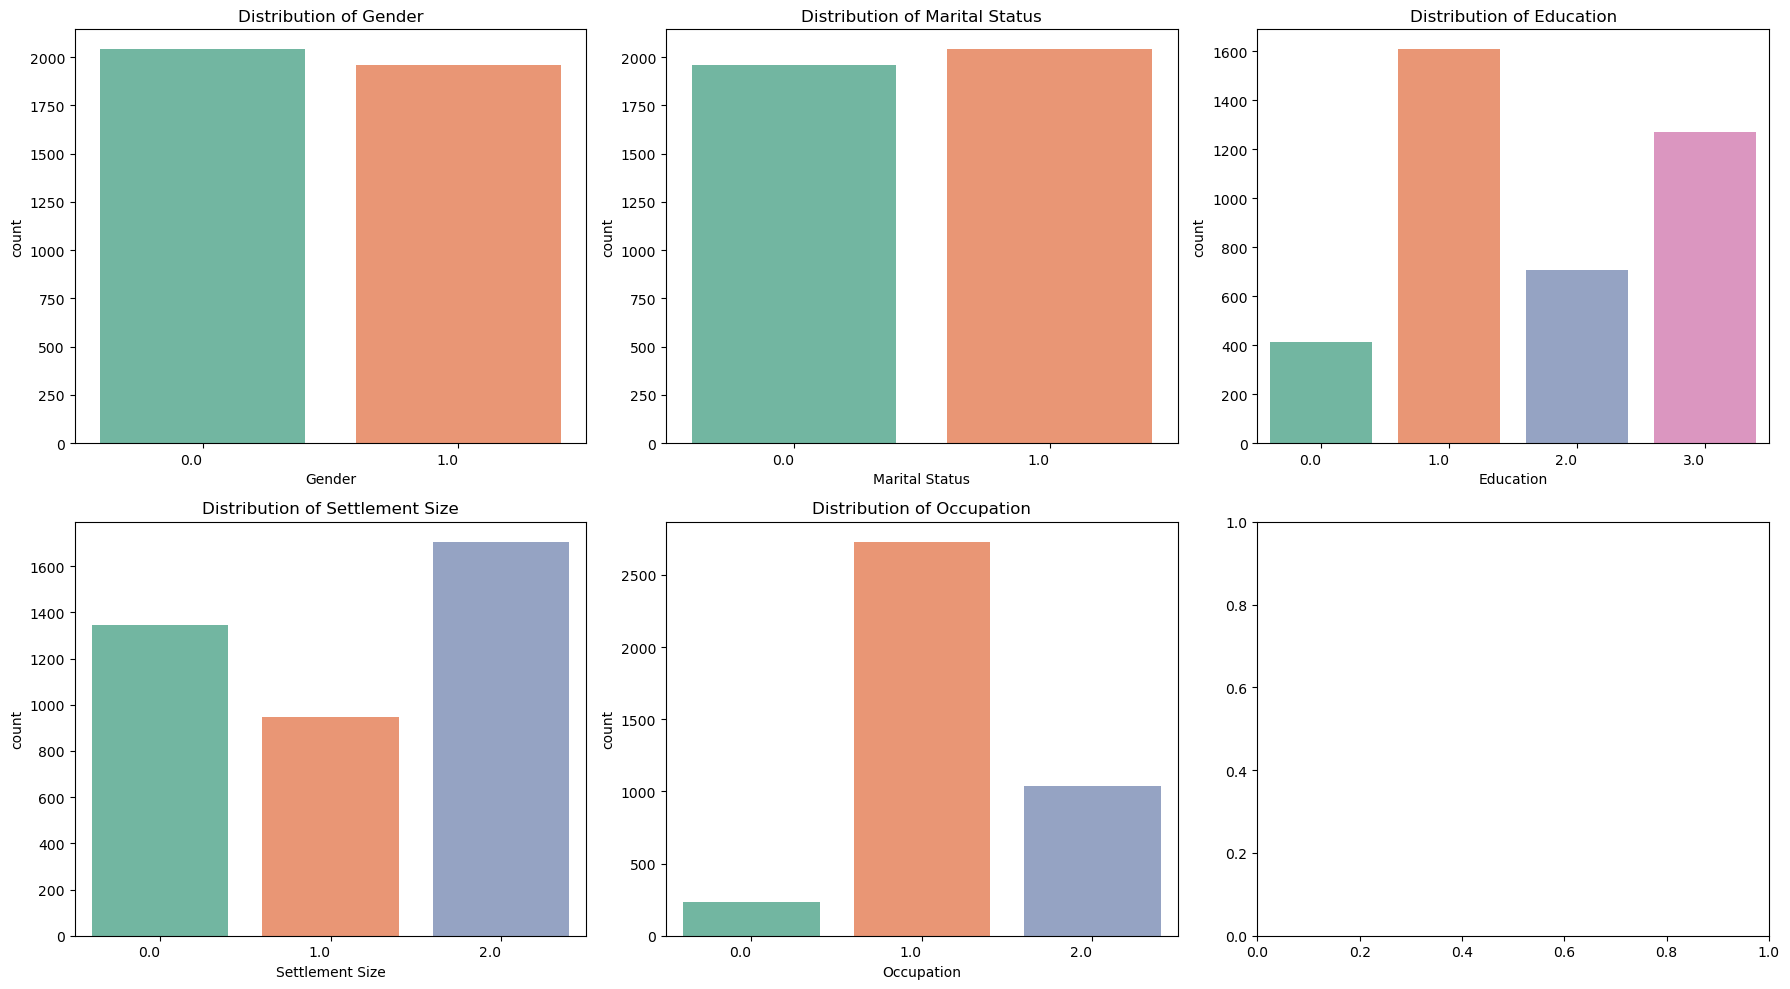

In [5]:
# Histograms for numerical variables
numerical_cols = ['Income', 'Age']
df[numerical_cols].hist(bins=20, figsize=(14, 7), layout=(1, 2), color='skyblue')
plt.tight_layout()
plt.show()

# Bar charts for categorical variables
categorical_cols = ['Gender', 'Marital Status', 'Education', 'Settlement Size', 'Occupation']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    sns.countplot(data=df, x=col, ax=ax, palette='Set2')
    ax.set_title(f'Distribution of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')

plt.tight_layout()
plt.show()

**Detect and drop outliers** - Add comment here in Word report (before and after clearing outliers)

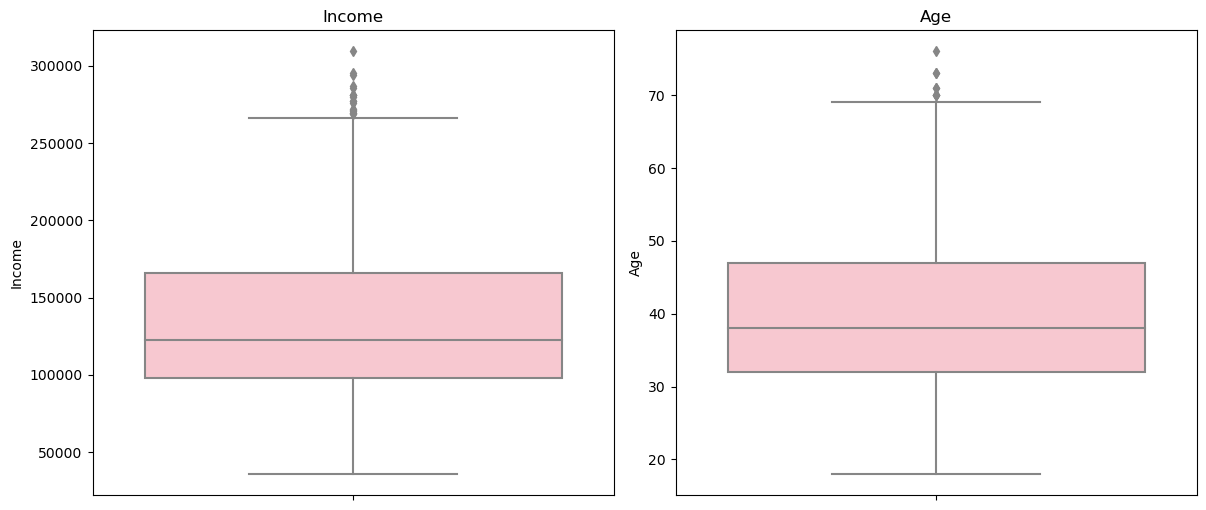

In [6]:
# Select numerical columns for boxplot
numerical_cols = ['Income', 'Age']

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Create boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='pink')
    plt.title(col)
    plt.tight_layout()

plt.show()


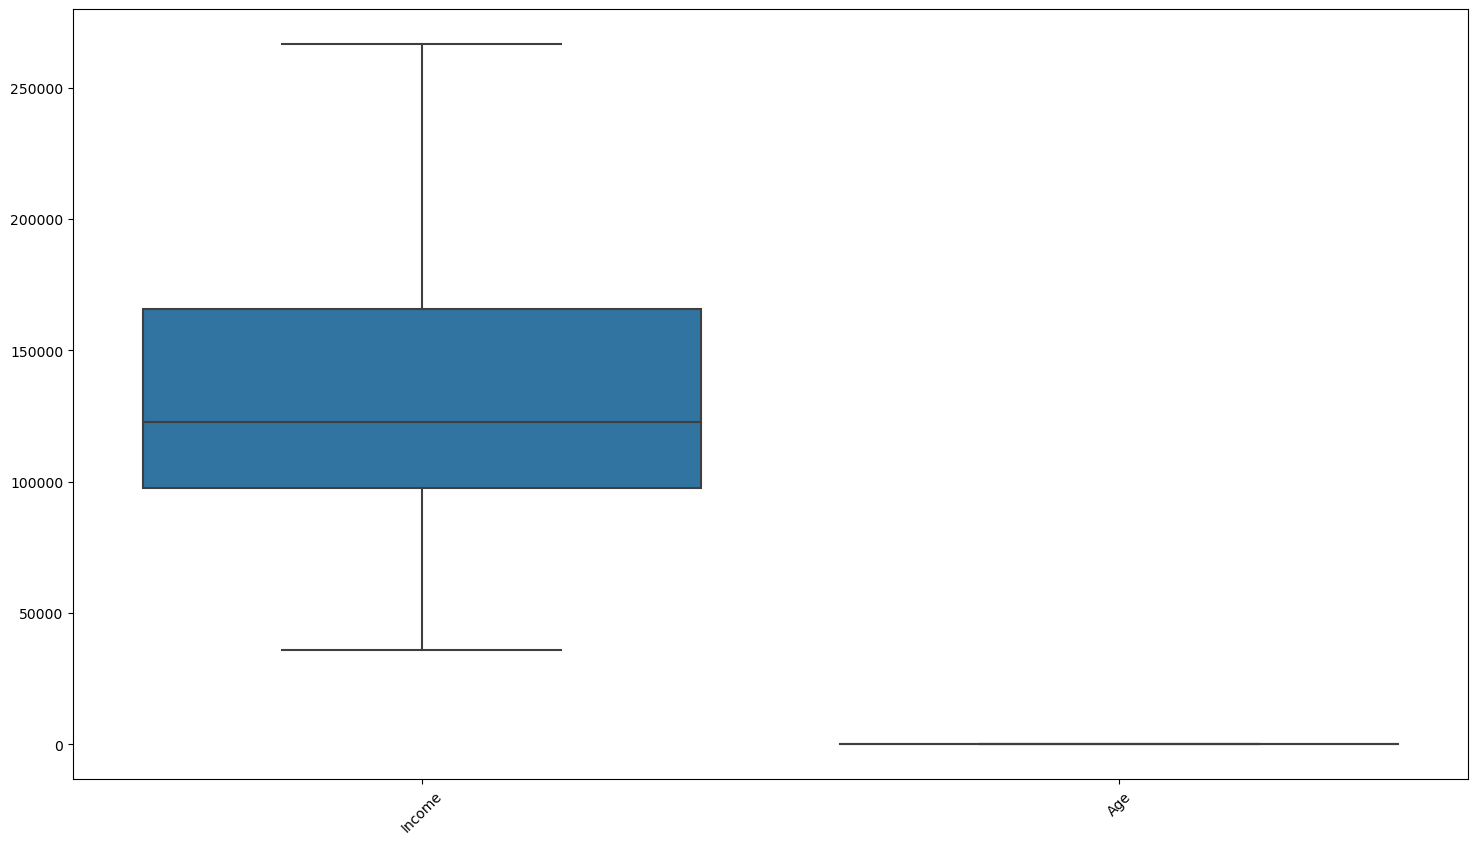

Gender             0
Marital Status     0
Education          0
Settlement Size    0
Occupation         0
Income             0
Age                0
dtype: int64


In [7]:
# Removing outliers by using enhanced boxplot
plt.figure(figsize=(18,10))
sns.boxplot(data = df[numerical_cols], showfliers = False) # Remove outliers
plt.xticks(rotation = 45)
plt.show()

print(df.isnull().sum()) # Check null values after filtering all outliers
#X = ['Gender', 'Marital Status', 'Education', 'Settlement Size', 'Occupation']

In [8]:
df.head()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0.0,0.0,3.0,2.0,2.0,185611,50
1,0.0,1.0,1.0,0.0,1.0,114778,30
2,0.0,1.0,1.0,0.0,0.0,132788,34
3,0.0,1.0,3.0,2.0,2.0,209671,55
4,1.0,1.0,1.0,2.0,1.0,118593,44


### 2. Customer Segmentation

In [9]:
sc = StandardScaler()
df[['Income', 'Age']] = sc.fit_transform(df[['Income', 'Age']])
print(df[['Income', 'Age']])

        Income       Age
0     1.056251  0.979092
1    -0.403396 -0.968623
2    -0.032266 -0.579080
3     1.552052  1.466021
4    -0.324781  0.394778
...        ...       ...
3995  1.740502  1.660793
3996 -0.317836 -0.871237
3997  0.337339 -0.189537
3998  0.142130 -0.384309
3999 -1.035986 -1.163395

[4000 rows x 2 columns]


In [10]:
X = df[['Gender', 'Marital Status', 'Education', 'Settlement Size', 'Occupation', 'Income', 'Age']]
print(X)

      Gender  Marital Status  Education  Settlement Size  Occupation  \
0        0.0             0.0        3.0              2.0         2.0   
1        0.0             1.0        1.0              0.0         1.0   
2        0.0             1.0        1.0              0.0         0.0   
3        0.0             1.0        3.0              2.0         2.0   
4        1.0             1.0        1.0              2.0         1.0   
...      ...             ...        ...              ...         ...   
3995     0.0             1.0        3.0              2.0         2.0   
3996     0.0             1.0        1.0              0.0         1.0   
3997     0.0             1.0        1.0              0.0         1.0   
3998     0.0             1.0        1.0              0.0         1.0   
3999     1.0             0.0        3.0              1.0         1.0   

        Income       Age  
0     1.056251  0.979092  
1    -0.403396 -0.968623  
2    -0.032266 -0.579080  
3     1.552052  1.466021  


***a. Elbow Method***

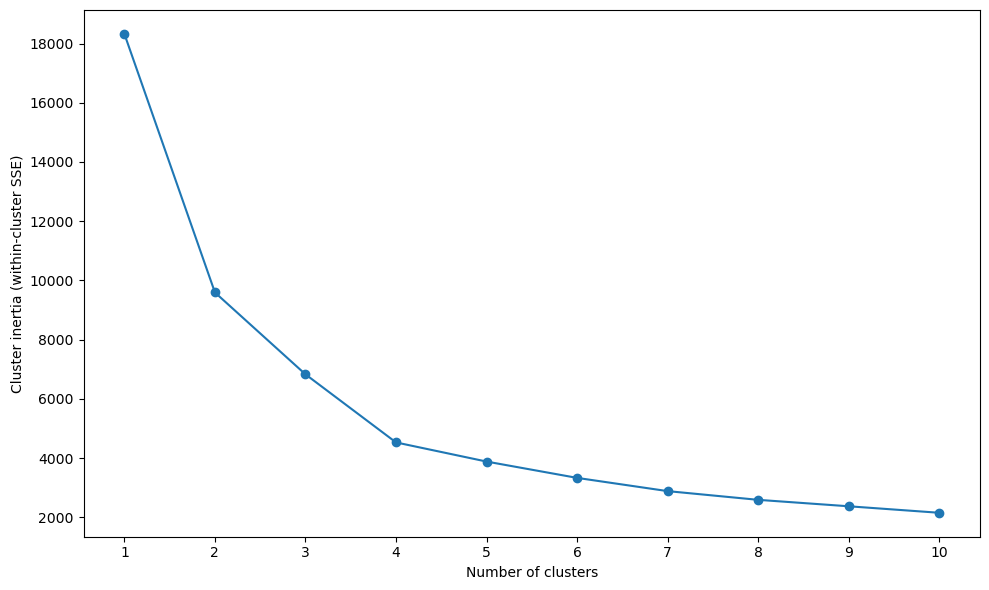

In [11]:
# Elbow Method for K-means
inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
plt.show()

***Silhouette Analysis***

[0 1]
silhouette_vals
 [0.63945016 0.56031114 0.5082508  ... 0.46767098 0.51081777 0.38143883]
silhouette_avg: 0.48


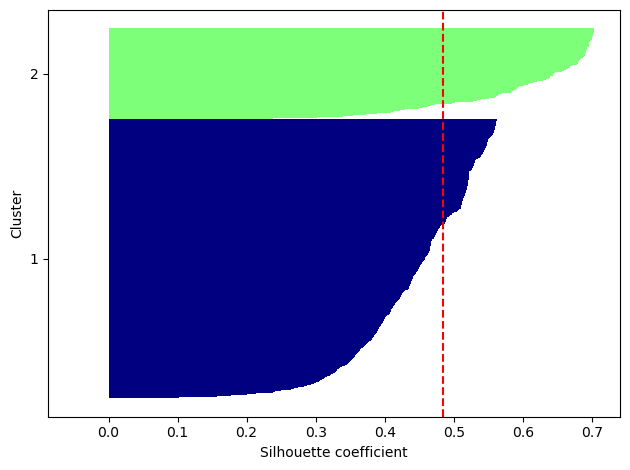

In [12]:
# Silhouette Analysis with n_clusters = 2 

km = KMeans(n_clusters=2,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
#print(y_km)

cluster_labels = np.unique(y_km)
print(cluster_labels)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
print('silhouette_vals\n', silhouette_vals)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

[0 1 2]
silhouette_vals
 [0.62751624 0.51448327 0.51975626 ... 0.62599682 0.63844066 0.3365633 ]
silhouette_avg: 0.42


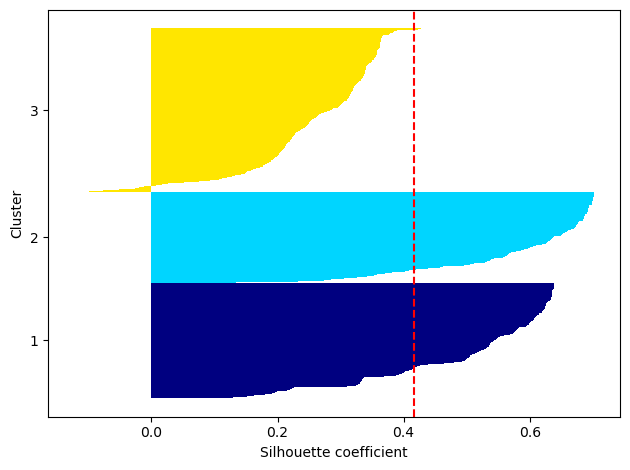

In [13]:
# Silhouette Analytis with n_clusters = 3

km = KMeans(n_clusters=3,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
#print(y_km)

cluster_labels = np.unique(y_km)
print(cluster_labels)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
print('silhouette_vals\n', silhouette_vals)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

[0 1 2 3]
silhouette_vals
 [0.62105676 0.47466271 0.51017122 ... 0.62711332 0.63273502 0.59756771]
silhouette_avg: 0.50


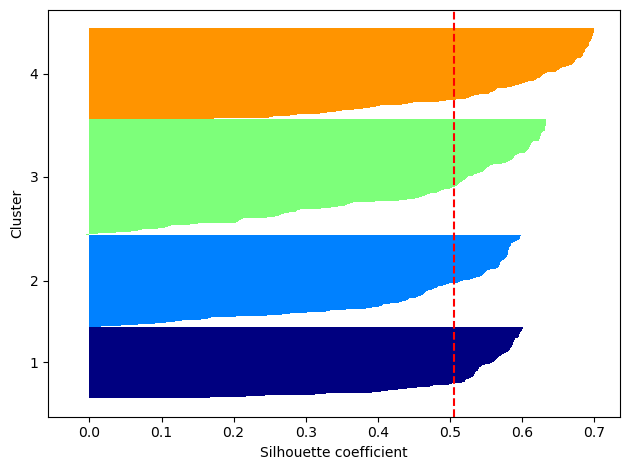

In [14]:
# Silhouette Analytis with n_clusters = 4 

km = KMeans(n_clusters=4,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
#print(y_km)

cluster_labels = np.unique(y_km)
print(cluster_labels)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
print('silhouette_vals\n', silhouette_vals)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

Explain here on which cluster we gonna use (4 clusters -> highest silhouette score & through elbow method)

And the spread of value looks stable

***c. Estimate the clusters using both K-means++ and Agglomerative Clustering***

In [15]:
# KMeans++ clustering

from sklearn.cluster import KMeans

km_plus = KMeans(n_clusters=4, 
            init='k-means++',  # use starndard k-means rather than k-means++ (see below)
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)

y_km_plus = km_plus.fit_predict(X)

print(y_km_plus)
print(f'\nClusters:\n {km_plus.cluster_centers_}')

[3 2 2 ... 2 2 1]

Clusters:
 [[ 0.89793282  0.56847545  0.58914729  1.99870801  0.97674419 -0.6899887
   0.03090205]
 [ 0.63141994  0.13293051  2.27693857  1.02618328  1.16314199 -0.93016553
  -1.04227556]
 [ 0.26571201  0.82736675  0.9451074   0.01909308  0.83373111  0.01659906
  -0.26251829]
 [ 0.30942623  0.44057377  3.          1.81352459  1.88934426  1.47217276
   1.37402349]]


In [16]:
# Agglomerative Clustering 
ac = AgglomerativeClustering(n_clusters=3, 
                             metric='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 ... 0 0 0]


### Provide tables presenting the cluster centres (all 7 variables) and customer counts for both clustering techniques

In [17]:
# Agglomerative Clustering Method
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(X, metric='euclidean')))

print(row_dist)


pd.Series(pdist(df, metric='euclidean'))

          0         1         2         3         4         5         6     \
0     0.000000  3.990509  4.075877  1.217751  3.041163  3.504813  1.825667   
1     3.990509  0.000000  1.135553  4.330274  2.620123  2.080695  4.960718   
2     4.075877  1.135553  0.000000  4.323483  2.652162  2.472732  4.863595   
3     1.217751  4.330274  4.323483  0.000000  3.266506  4.215024  0.832513   
4     3.041163  2.620123  2.652162  3.266506  0.000000  2.355589  3.852397   
...        ...       ...       ...       ...       ...       ...       ...   
3995  1.390293  4.528811  4.489960  0.271015  3.445023  4.447062  0.561612   
3996  3.913034  0.129632  1.080234  4.237837  2.569600  2.112305  4.858130   
3997  3.447104  1.075018  1.135056  3.635437  2.404127  2.544502  4.157508   
3998  3.562931  0.799388  1.033610  3.796261  2.413500  2.387284  4.351920   
3999  3.459437  2.727289  3.057593  4.196638  2.988932  1.006967  4.944400   

          7         8         9     ...      3990      3991    

0          3.990509
1          4.075877
2          1.217751
3          3.041163
4          3.504813
             ...   
7997995    0.669827
7997996    2.757008
7997997    0.275758
7997998    3.135988
7997999    2.999155
Length: 7998000, dtype: float64

In [25]:
from scipy.cluster.hierarchy import linkage


row_clusters = linkage(pdist(X, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {i + 1}' for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,563.0,1968.0,0.000000,2.0
cluster 2,483.0,3415.0,0.000000,2.0
cluster 3,497.0,1416.0,0.000000,2.0
cluster 4,821.0,1383.0,0.000000,2.0
cluster 5,251.0,2280.0,0.000000,2.0
...,...,...,...,...
cluster 3995,7982.0,7991.0,4.060234,1792.0
cluster 3996,7989.0,7990.0,4.645798,788.0
cluster 3997,7993.0,7994.0,4.833042,2790.0
cluster 3998,7992.0,7995.0,6.235594,1210.0
